In [2]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
def calculate_x(pd:float) -> bool: 
    return 1 if random.random() < pd else 0 

In [4]:
def bank(EAD: np.array, LGD: float, PD):
    length = len(EAD)
    pdArray = np.array(list(map(calculate_x, np.ones(length) * PD)))
    Li = EAD * LGD * pdArray
    Ln = Li.sum()

    return Ln

# Question 1: Data Analysis

### Create the method to do the first two points of the question

In [5]:
def q1(name:str, EAD:np.array, LGD:float, PD, length=1000):
    # sample: 
    Ln = np.array([bank(EAD, LGD, PD) for _ in range(length)])

    # Plot the histogram 
    plt.hist(Ln, bins=30, edgecolor='k') # TODO: make this sqrt(length) 
    plt.title(f'Histogram of Portfolio Loss of {name}')
    plt.xlabel('Loss')
    plt.ylabel('Frequency')
    plt.show()

    # Provide the average, minimum and maximum of the sampled values: 
    print(f"""[i] Practical Values
            Average: {np.mean(Ln)}
            Minimum: {Ln.min()}
            Maximum: {Ln.max()}
    """)

    # Theoretical Values: 
    print(f"""[i] Theoretical Values
            Expected: {sum(EAD * LGD * PD)}
            minimum: 0 
            maximum: {sum(EAD * LGD)}""")
    # TODO: I'm not sure about the validity of the minimum and maximum, I just used logic. Check if this is correct. 
    


In [6]:
# we can calculate the theoretical expected by replacing X_i with PD_i since expected is the sum of the variable * its probability for all possible outcomes
# Theoretical minimum would be 0 since every X would be 0.
# Theoretical maximum would be the case where all X value would be 1.

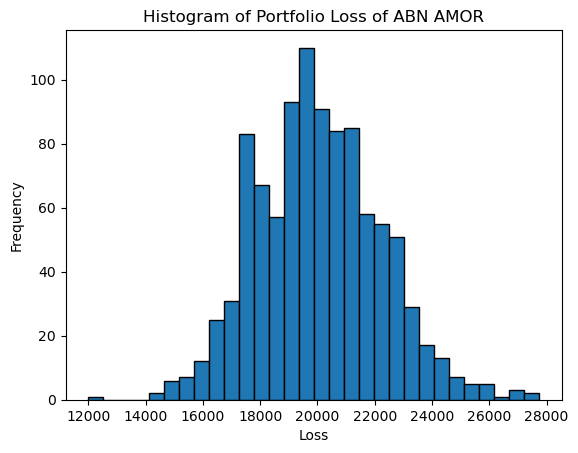

[i] Practical Values
            Average: 20009.5
            Minimum: 12000.0
            Maximum: 27750.0
    
[i] Theoretical Values
            Expected: 20000.0
            minimum: 0 
            maximum: 2000000.0


In [7]:
# ABN AMOR
def q1_abn_amor(): 

    EAD = np.ones(8000) * 1000
    LGD = 0.25 
    PD = 0.01 

    q1("ABN AMOR", EAD, LGD, PD)

q1_abn_amor()

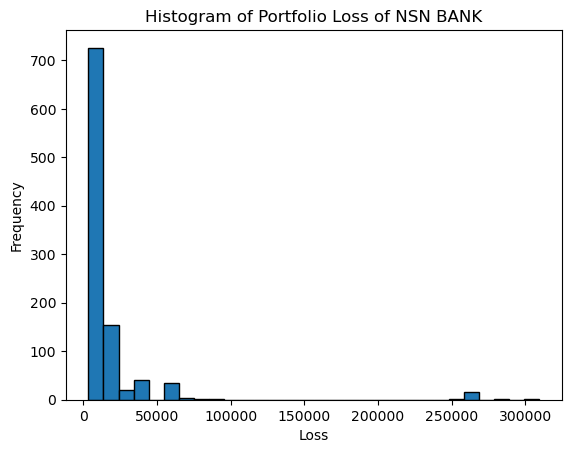

[i] Practical Values
            Average: 19326.0
            Minimum: 3500.0
            Maximum: 309500.0
    
[i] Theoretical Values
            Expected: 20000.0
            minimum: 0 
            maximum: 1000000.0


In [8]:
# NSN BANK
def q1_nsn_bank(): 

    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = 0.02

    q1("NSN BANK", EAD, LGD, PD)

q1_nsn_bank()

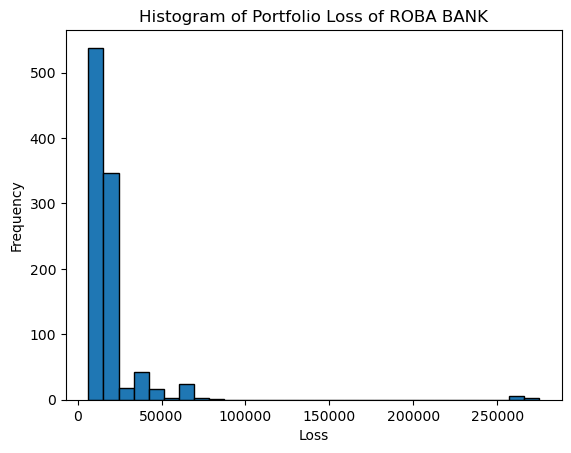

[i] Practical Values
            Average: 19865.5
            Minimum: 6500.0
            Maximum: 275000.0
    
[i] Theoretical Values
            Expected: 20000.0
            minimum: 0 
            maximum: 1000000.0


In [9]:
# ROBA BANK
def q1_roba_bank(): 

    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)

    q1("ROBA BANK", EAD, LGD, PD)
q1_roba_bank()

# Question 2

In [10]:
# def calculate_pd(PD, R:float=0.25, Y:float=stats.norm(loc=0, scale=1).rvs(1)): 
#     return stats.norm.cdf((stats.norm.ppf(PD) - (R * Y)) / (np.sqrt(1 - (R**2))))

def bank(EAD: np.array, LGD: float, PD):
    length = len(EAD)
    pdArray = np.array(list(map(calculate_x, np.ones(length) * PD)))
    Li = EAD * LGD * pdArray
    Ln = Li.sum()

    return Ln

class question2(): 
    def __init__(self):
        self.Y = stats.norm(loc=0, scale=1).rvs(1)

    def calculate_pd(self, PD, R:float=0.25, Y:float=stats.norm(loc=0, scale=1).rvs(1)): 
        return stats.norm.cdf((stats.norm.ppf(PD) - (R * Y)) / (np.sqrt(1 - (R**2))))
    
    def simulate(self, EAD, LGD, PD, n=1000): 
        # 1 - Convert the old PD into the new PD
        if type(PD) == float: 
            PD = self.calculate_pd(PD, Y=self.Y)
        else: 
            PD = np.array([self.calculate_pd(i, Y=self.Y)[0] for i in PD])
            
        # 2 - run the simulation
        Ln = np.array([bank(EAD, LGD, PD) for _ in range(n)])

        return Ln 
    
    def calculations(self, Ln:np.ndarray, alpha=0.99): 
        EL = Ln.mean() 
        UL = np.sqrt(Ln.var()) 
        VaR_alpha = np.percentile(Ln, (1 - alpha) * 100)
        EC_alpha = VaR_alpha - EL 
        tail_condition_expectation = np.mean([i for i in Ln if i > VaR_alpha]) 

        print(f"EL:{EL}")
        print(f"UL:{UL}")
        print(f"VaR Alpha:{VaR_alpha}")
        print(f"EC Alpha:{EC_alpha}")
        print(f"Tail Condition Expectation:{tail_condition_expectation}")


def run_q2(): 
    q2 = question2()

    print("ABN AMOR")
    EAD = np.ones(8000) * 1000
    LGD = 0.25 
    PD = 0.01 

    q2.calculations(q2.simulate(EAD, LGD, PD))
    print()


    print("NSN BANK")
    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = 0.02

    q2.calculations(q2.simulate(EAD, LGD, PD))
    print()

    print("ROBA BANK")
    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)

    q2.calculations(q2.simulate(EAD, LGD, PD))
    print()
run_q2()

ABN AMOR
EL:31772.75
UL:2737.707971552116
VaR Alpha:25747.500000000004
EC Alpha:-6025.249999999996
Tail Condition Expectation:31850.757575757576

NSN BANK
EL:32323.5
UL:48405.81677598262
VaR Alpha:10000.0
EC Alpha:-22323.5
Tail Condition Expectation:32647.565922920894

ROBA BANK
EL:32267.0
UL:34674.979610664515
VaR Alpha:15000.0
EC Alpha:-17267.0
Tail Condition Expectation:32524.847870182555



# Question 3

In [28]:
def run_q3():

    def __init__(self):
        self.Y = stats.norm(loc=0, scale=1).rvs(1)

    q3 = question2()

    print("ABN AMOR")
    PD = 0.01
    default_first_step = q3.calculate_pd(PD)
    print(default_first_step)

    print("NSN BANK")
    PD = 0.02
    default_first_step = q3.calculate_pd(PD)
    print(default_first_step)

    print("ROBA BANK")
    PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)
    default_first_step = np.array(q3.calculate_pd(i) for i in PD)
    print(default_first_step)

    

run_q3()

ABN AMOR
[0.00584077]
NSN BANK
[0.01254279]
ROBA BANK
<generator object run_q3.<locals>.<genexpr> at 0x000001C8E9C3F840>
